# Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split #Used to split data set into training and testing
import csv
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error 

# Importing and splitting dataset

In [2]:
file = pd.read_csv("audi.csv", quotechar='"', skipinitialspace=True)
Y = file.price
X = file.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1) 
X = X.head(200)
Y = Y.head(200)
print(file)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)

# Normalizing Data

In [4]:
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)

# KNN using Scikit-Learn

In [5]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
knn = KNN_Reg(n_neighbors = 50)
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))

0.4148560657792606


Text(0, 0.5, 'R^2')

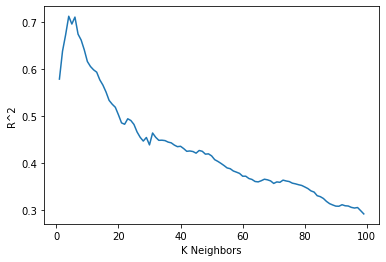

In [6]:
results = np.empty(99)
for k in range(1, 100):
    knn = KNN_Reg(n_neighbors = k)
    knn.fit(X_train, Y_train)
    results[k - 1] = (knn.score(X_test, Y_test))

plt.plot(np.arange(99) + 1, results)
plt.xlabel('K Neighbors')
plt.ylabel('R^2')

# Euclidean Distance

In [7]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable2[i])**2
    return np.sqrt(distance)

# KNN

In [8]:
def kNN(train, testRow, yTrain, yTest, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)-1):
        dist = eucDistance(train[i], testRow) #sends points to work out distance
        distance.append((train[i], dist, yTrain.iloc[i])) 
    distance = sort(distance) #need to create a sort method to order list
    kNeighbours = list() #list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# Sort Method

In [9]:
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [29]:
from statistics import mean 

def predict(train, test, yTrain, yTest, num_neighbors):
    predictions = list()
    for i in range(len(test)): #Sends each test variable
        neighbour = kNN(train, test[i], yTrain, yTest, num_neighbors)
        labels = [] #Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) #Appends yTrain
        predictions.append(mean(labels))
    return predictions

# Evaluation Method

In [55]:
def eva(train, test, yTrain, yTest):
    rmseValues = []
    for k in range(1, 101): #Testing up to 100 neearest neighbours
        y_pred = predict(train, test, yTrain, yTest, k)

        error = rmse(yTest, y_pred) 
        rmseValues.append(error)
        print('RMSE value for k =' , k , 'is:', error)
        
    plt.plot(np.arange(100) + 1, rmseValues)
    plt.xlabel('K Neighbors')
    plt.ylabel('RMSE')
    
    return

RMSE value for k = 1 is: 3187.5175826966038
RMSE value for k = 2 is: 2981.1328182420857
RMSE value for k = 3 is: 2832.3016435401087
RMSE value for k = 4 is: 2677.86039964745
RMSE value for k = 5 is: 2728.254108399729
RMSE value for k = 6 is: 2652.160549438891
RMSE value for k = 7 is: 2819.4049478569054
RMSE value for k = 8 is: 2868.805420379709
RMSE value for k = 9 is: 2931.7470764034197
RMSE value for k = 10 is: 3044.629268071895
RMSE value for k = 11 is: 3087.2811371820353
RMSE value for k = 12 is: 3109.1668916286885
RMSE value for k = 13 is: 3134.5275465371174
RMSE value for k = 14 is: 3197.057203116641
RMSE value for k = 15 is: 3240.6834742072547
RMSE value for k = 16 is: 3300.65303235587
RMSE value for k = 17 is: 3358.3843377433736
RMSE value for k = 18 is: 3389.7698948453713
RMSE value for k = 19 is: 3417.154558986175
RMSE value for k = 20 is: 3464.2265110699677
RMSE value for k = 21 is: 3524.455067099026
RMSE value for k = 22 is: 3513.020093879339
RMSE value for k = 23 is: 3473.

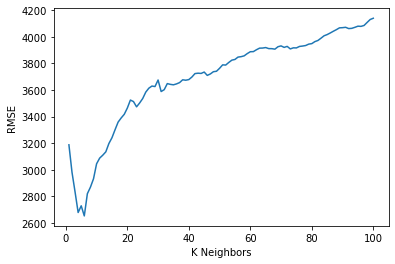

In [56]:
eva(X_train, X_test, Y_train, Y_test)

In [45]:
def rmse(test, pred):
  return sqrt(mean_squared_error(test, pred))

# 1NN

In [66]:
def NN(train, test, yTrain, yTest):    
    y_pred = predict(train, test, yTrain, yTest, 6)
    error = rmse(yTest, y_pred) 
    print('RMSE value for k =' , 6 , 'is:', error)
    for i in range(len(y_pred)):
        print("\nOriginal value:", yTest.iloc[i], "vs the predicted value:", y_pred[i])
        print("The difference is:", yTest.iloc[i] - y_pred[i])
    return 

NN(X_train, X_test, Y_train, Y_test)

RMSE value for k = 6 is: 2652.160549438891

Original value: 16985 vs the predicted value: 15716
The difference is: 1269

Original value: 15000 vs the predicted value: 18150
The difference is: -3150

Original value: 19100 vs the predicted value: 21013
The difference is: -1913

Original value: 16500 vs the predicted value: 15366
The difference is: 1134

Original value: 17000 vs the predicted value: 17249
The difference is: -249

Original value: 10500 vs the predicted value: 12266
The difference is: -1766

Original value: 11500 vs the predicted value: 15865
The difference is: -4365

Original value: 17100 vs the predicted value: 15716
The difference is: 1384

Original value: 11700 vs the predicted value: 13580
The difference is: -1880

Original value: 13100 vs the predicted value: 16783
The difference is: -3683

Original value: 16600 vs the predicted value: 16333
The difference is: 267

Original value: 15000 vs the predicted value: 13765
The difference is: 1235

Original value: 30985 vs th